This notebook simulates a 2 $\mu m$ silicon PV with different AR coatings and
plots their visible absorbance, reproducing the plot Figure 4 and the data in Table III in "Accelerating the discovery of multi-layer nanostructures with analytic differentiation of the transfer matrix equations" by J. F. Varner, D. Wert, A. Matari, R. Nofal, and J. J. Foley IV.

  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K
  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K
  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K
  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K


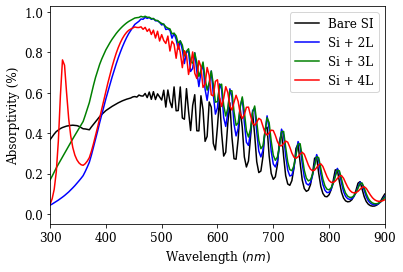

In [8]:
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

### Just Si
bare_si = {
    
    'Material_List': ['Air', 'Si', 'Air'],
    'Thickness_List': [0, 2000e-9, 0],
    'Lambda_List': [300e-9, 4000e-9, 1000]
    
}

### Si with 2-layer AR coating
dof2_structure = {
        'Material_List' : ['Air', 'AlN','SiO2', 'Si','Air'],
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 10.14e-9, 35.70e-9, 2000e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000]
        }

### Si with 3-layer AR coating
dof3_structure = {
    
        'Material_List' : ['Air', 'SiO2', 'AlN','SiO2', 'Si','Air'],
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 49.01e-9, 11.00e-9, 20.09e-9, 2000e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        }

### Si with 4-layer AR coating
dof4_structure = {        
        'Material_List' : ['Air', 'AlN', 'SiO2','AlN','SiO2', 'Si','Air'],
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 4.73e-9, 49.01e-9, 38.44e-9, 10.00e-9, 2000e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        }

### create instances of each multilayer
pv    = multilayer(bare_si)
pv_2l = multilayer(dof2_structure)
pv_3l = multilayer(dof3_structure)
pv_4l = multilayer(dof4_structure)

#n_aln = pv_4l.layer_ri(1)
#plt.plot(pv_4l.lambda_array*1e9, np.real(n_aln), 'purple')


### plot absorption spectrum of each structure
#### Top subplot - zoomed out!
plt.plot(pv.lambda_array*1e9, pv.emissivity_array, 'black', label='Bare SI')
plt.plot(pv.lambda_array*1e9, pv_2l.emissivity_array, 'blue', label='Si + 2L')
plt.plot(pv.lambda_array*1e9, pv_3l.emissivity_array, 'green', label='Si + 3L')
plt.plot(pv.lambda_array*1e9, pv_4l.emissivity_array, 'red', label='Si + 4L')
plt.xlim(300,900)
plt.ylabel('Absorptivity (%)')
plt.xlabel('Wavelength ($nm$)')
plt.legend()





In [4]:
### Compute PV conversion efficiency for each structure
pv.pv_conversion_efficiency()
pv_2l.pv_conversion_efficiency()
pv_3l.pv_conversion_efficiency() 
pv_4l.pv_conversion_efficiency()

print("  Conversion efficiency of bare Si",pv.conversion_efficiency_val*100)
print("  Conversion efficiency of bare Si+2L",pv_2l.conversion_efficiency_val*100)
print("  Conversion efficiency of bare Si+3L",pv_3l.conversion_efficiency_val*100)
print("  Conversion efficiency of bare Si+4L",pv_4l.conversion_efficiency_val*100)


  Conversion efficiency of bare Si 5.732876252026823
  Conversion efficiency of bare Si+2L 7.878227632216834
  Conversion efficiency of bare Si+3L 8.336180991766645
  Conversion efficiency of bare Si+4L 8.257121018025696
